In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import hvplot.pandas

# Turn off warning messages
import warnings
warnings.filterwarnings("ignore")

In [10]:
# Read .csv into a DataFrame and split by '\t'
elnino_lanina = pd.read_csv('../Data/Raw/El-Nino_La-Nina/El-Nino_La-Nina.csv', sep='\t')

# Set 'Season' as index (optional)
elnino_lanina.set_index('Season', inplace=True)

# Convert the entire DataFrame to integers (if needed)
elnino_lanina = elnino_lanina.astype(float)
elnino_lanina = elnino_lanina.reset_index()
elnino_lanina = elnino_lanina.rename(columns={'Season':'Years'})
elnino_lanina

,Years,JJA,JAS,ASO,SON,OND,NDJ,DJF,JFM,FMA,MAM,AMJ,MJJ
0,1950,-0.5,-0.4,-0.4,-0.4,-0.6,-0.8,-0.8,-0.5,-0.2,0.2,0.4,0.6
1,1951,0.7,0.9,1.0,1.2,1.0,0.8,0.5,0.4,0.3,0.3,0.2,0.0
2,1952,-0.1,0.0,0.2,0.1,0.0,0.1,0.4,0.6,0.6,0.7,0.8,0.8
3,1953,0.7,0.7,0.8,0.8,0.8,0.8,0.8,0.5,0.0,-0.4,-0.5,-0.5
4,1954,-0.6,-0.8,-0.9,-0.8,-0.7,-0.7,-0.7,-0.6,-0.7,-0.8,-0.8,-0.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
63,2013,-0.4,-0.4,-0.3,-0.2,-0.2,-0.3,-0.4,-0.4,-0.2,0.1,0.3,0.2
64,2014,0.1,0.0,0.2,0.4,0.6,0.7,0.6,0.6,0.6,0.8,1.0,1.2
65,2015,1.5,1.8,2.1,2.4,2.5,2.6,2.5,2.2,1.7,1.0,0.5,0.0
66,2016,-0.3,-0.6,-0.7,-0.7,-0.7,-0.6,-0.3,-0.1,0.1,0.3,0.4,0.4


In [11]:
# Melt to reshape the DataFrame with one row for each column
elnino_lanina = elnino_lanina.rename(columns={'JJA':'Jan','JAS':'Feb','ASO':'Mar','SON':'Apr','OND':'May',
                                              'NDJ':'June','DJF':'July','JFM':'Aug','FMA':'Sep','MAM':'Oct',
                                              'AMJ':'Nov','MJJ':'Dec'})

# Melt to reshape the DataFrame with one row for each column
elnino_lanina_melted = pd.melt(elnino_lanina, id_vars='Years', var_name='Month', value_name='Oceanic Index')

# Groupby year and find the average of Oceanic Nino Index
oceanic_nino_index_avg = elnino_lanina_melted.groupby(['Years'])['Oceanic Index'].mean().reset_index()

# Reset df name
elnino_lanina = oceanic_nino_index_avg

elnino_lanina

,Years,Oceanic Index
0,1950,-0.283333
1,1951,0.608333
2,1952,0.350000
3,1953,0.375000
4,1954,-0.733333
...,...,...
63,2013,-0.183333
64,2014,0.566667
65,2015,1.733333
66,2016,-0.233333


In [12]:
elnino_lanina['El Nino or La Nina Year'] = ''

# From averages decide whether the year was an El Nino or La Nina 
elnino_lanina.loc[elnino_lanina['Oceanic Index'] > 0, 'El Nino or La Nina Year'] = 'El Nino'
elnino_lanina.loc[elnino_lanina['Oceanic Index'] <= 0, 'El Nino or La Nina Year'] = 'La Nina'
elnino_lanina

,Years,Oceanic Index,El Nino or La Nina Year
0,1950,-0.283333,La Nina
1,1951,0.608333,El Nino
2,1952,0.350000,El Nino
3,1953,0.375000,El Nino
4,1954,-0.733333,La Nina
...,...,...,...
63,2013,-0.183333,La Nina
64,2014,0.566667,El Nino
65,2015,1.733333,El Nino
66,2016,-0.233333,La Nina


In [13]:
# Create blank column to assign magnitude of index
elnino_lanina['Magnitude'] = ''

# Assign magnitude of index 
# https://ggweather.com/enso/oni.htm
def assign_magnitude(row):
    if row['El Nino or La Nina Year'] == 'El Nino':
        if 0.5 <= row['Oceanic Index'] <= 0.9:
            return 'Weak'
        elif 1.0 <= row['Oceanic Index'] <= 1.4:
            return 'Moderate'
        elif 1.5 <= row['Oceanic Index'] <= 1.9:
            return 'Strong'
        elif row['Oceanic Index'] >= 2:
            return 'Very Strong'
        else:
            return 'Neutral'
    elif row['El Nino or La Nina Year'] == 'La Nina':
        if -0.9 <= row['Oceanic Index'] <= -0.5:
            return 'Weak'
        elif -1.4 <= row['Oceanic Index'] <= -1.0:
            return 'Moderate'
        elif -1.9 <= row['Oceanic Index'] <= -1.5:
            return 'Strong'
        elif row['Oceanic Index'] <= -2:
            return 'Very Strong'
        else:
            return 'Neutral'
    else:
        return 'Unknown'

# Apply the function to create the 'Magnitude' column
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.apply.html
elnino_lanina['Magnitude'] = elnino_lanina.apply(assign_magnitude, axis=1)


elnino_lanina



,Years,Oceanic Index,El Nino or La Nina Year,Magnitude
0,1950,-0.283333,La Nina,Neutral
1,1951,0.608333,El Nino,Weak
2,1952,0.350000,El Nino,Neutral
3,1953,0.375000,El Nino,Neutral
4,1954,-0.733333,La Nina,Weak
...,...,...,...,...
63,2013,-0.183333,La Nina,Neutral
64,2014,0.566667,El Nino,Weak
65,2015,1.733333,El Nino,Strong
66,2016,-0.233333,La Nina,Neutral


# El Nino and La Nina Analysis

In [14]:
# El Nino magnitude counts and averages
el_nino_mag = elnino_lanina.loc[elnino_lanina['El Nino or La Nina Year'] == 'El Nino']
el_nino_counts = el_nino_mag.groupby('El Nino or La Nina Year')['Magnitude'].value_counts()

el_nino_average = el_nino_counts / el_nino_counts.sum() * 100

# La Nina magnitude counts and averages
la_nina_mag = elnino_lanina.loc[elnino_lanina['El Nino or La Nina Year'] == 'La Nina']
la_nina_counts = la_nina_mag.groupby('El Nino or La Nina Year')['Magnitude'].value_counts()

la_nina_average = la_nina_counts / la_nina_counts.sum() * 100

# Set to dfs
el_nino_magnitude = pd.DataFrame({'Total':el_nino_counts,
                                       '% of Oceanic Index':el_nino_average})
el_nino_magnitude.reset_index()

la_nina_magnitude = pd.DataFrame({'Total':la_nina_counts,
                                       '% of Oceanic Index':la_nina_average})
la_nina_magnitude.reset_index()

# Concat df
la_nina_el_nino_magnitude = pd.concat([el_nino_magnitude, la_nina_magnitude])

la_nina_el_nino_magnitude

Total  % of Oceanic Index
El Nino or La Nina Year Magnitude                           
El Nino                 Neutral       16           48.484848
                        Weak          10           30.303030
                        Moderate       4           12.121212
                        Strong         3            9.090909
La Nina                 Neutral       24           68.571429
                        Moderate       6           17.142857
                        Weak           5           14.285714

From 1990-2017 both El Nino and La Nina have had a greater percentage of neutral years of oceanic water temperatures. El Nino has had a greater affect of 30% Weak magnitude versus La Nina's 14% Moderate magnitue.

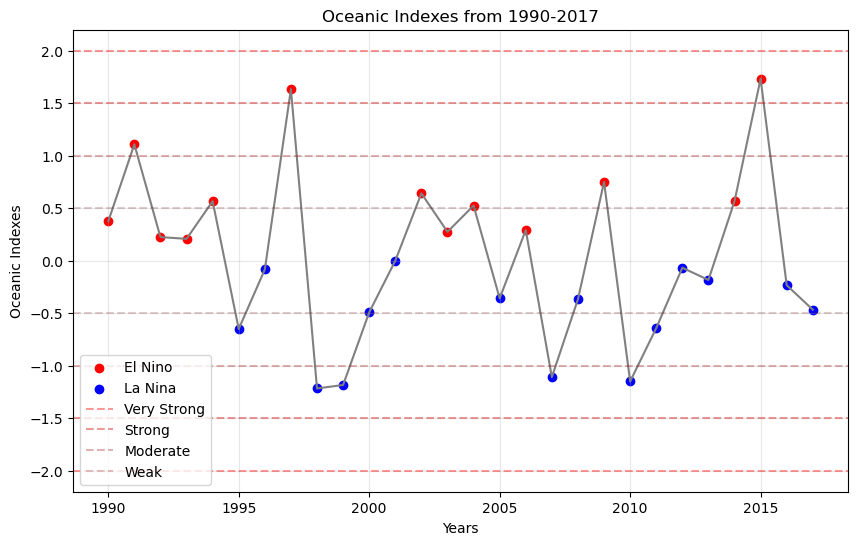

In [15]:
# Filter for only 1990-2017 that avaiable in other datasets
filtered_years = elnino_lanina[(elnino_lanina['Years'] >= 1990) & (elnino_lanina['Years'] <= 2017)]

# Set data for El Nino and La Nina
el_nino = filtered_years[filtered_years['El Nino or La Nina Year'] == 'El Nino']
la_nina = filtered_years[filtered_years['El Nino or La Nina Year'] == 'La Nina']

# Plot El Nino and La Nina data
plt.figure(figsize=(10, 6))
plt.plot(filtered_years['Years'], filtered_years['Oceanic Index'], color='gray')
plt.scatter(el_nino['Years'], el_nino['Oceanic Index'], color='red', label='El Nino')
plt.scatter(la_nina['Years'], la_nina['Oceanic Index'], color='blue', label='La Nina')

# Plot magnitude lines for El Nino
plt.axhline(y=2, color=(1.0, 0.0, 0.0, 0.3), linestyle='--', label=f'Very Strong', alpha=0.4)
plt.axhline(y=1.5, color=(0.8, 0.0, 0.0, 0.5), linestyle='--', label=f'Strong', alpha=0.4)
plt.axhline(y=1.0, color=(0.6, 0.0, 0.0, 0.7), linestyle='--', label=f'Moderate', alpha=0.3)
plt.axhline(y=0.5, color=(0.4, 0.0, 0.0, 0.9), linestyle='--', label=f'Weak', alpha=0.2)

# Plot magnitude lines for La Nina
plt.axhline(y=-2, color=(1.0, 0.0, 0.0, 0.3), linestyle='--', alpha=0.4)
plt.axhline(y=-1.5, color=(0.8, 0.0, 0.0, 0.5), linestyle='--', alpha=0.4)
plt.axhline(y=-1.0, color=(0.6, 0.0, 0.0, 0.7), linestyle='--', alpha=0.3)
plt.axhline(y=-0.5, color=(0.4, 0.0, 0.0, 0.9), linestyle='--', alpha=0.2)

# Config scatter plot
plt.title('Oceanic Indexes from 1990-2017')
plt.xlabel('Years')
plt.ylabel('Oceanic Indexes')
plt.legend()
plt.grid(True, alpha=0.3)

# Save figure
plt.savefig('../Visuals/el_nino_la_nina/fig1_oceanic_indexes.png')

plt.show()

In [16]:
# Save .csv to 'Cleaned' folder
elnino_lanina.to_csv('../Data/Cleaned/elnino_lanina.csv', index=False)